In [58]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import ingest
import numpy as np
import pandas as pd
df = ingest.setup('../../capture/capture1')

Dropped 1 outlier coordinate


In [74]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import ingest2
import numpy as np
import pandas as pd
df = ingest2.setup('../../capture/capture1')

Dropped 1 outlier coordinate


In [75]:
import warnings
warnings.filterwarnings('ignore')
errors2 = ingest2.compare_errors()

Processing with 7 cores...


HBox(children=(IntProgress(value=0, description='Methods', max=12), HTML(value='')))

In [65]:
import warnings
warnings.filterwarnings('ignore')
errors = ingest.error(ingest.error_methods)
#errors_uncorrected = ingest.error(ingest.error_methods, true_bearing=False)
#errors_dbm = ingest.error(ingest.error_methods, mw=False)

HBox(children=(IntProgress(value=0, description='Preparing data', max=4342), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Interpolating', max=52104), HTML(value='')))

In [83]:
# Print the median results by method
errors_display = errors.groupby('method')['error'].apply(lambda x: pd.Series.mean(pd.Series.abs(x))).sort_values()
errors2_display = errors2.groupby('method')['error'].apply(lambda x: pd.Series.median(pd.Series.abs(x))).sort_values()
#errors_display.plot(kind='bar', title="Overall")

print(errors_display)
print(errors2_display)
# Errors in dbm
#errors_display_dbm = errors_display = errors_dbm.groupby('method')['error'].apply(lambda x: pd.Series.median(pd.Series.abs(x))).sort_values()
#print(errors_display_dbm)

method
barycentric             78.541840
linear                  81.651648
slinear                 82.078688
pchip                   82.106642
akima                   82.136816
from_derivatives        82.891220
piecewise_polynomial    82.891220
naive                   83.600225
quadratic               83.615595
cubic                   84.645279
krogh                   85.045995
random                  90.198985
Name: error, dtype: float64
method
barycentric             66.438635
linear                  68.438635
slinear                 68.619052
naive                   69.438635
pchip                   69.438635
from_derivatives        69.455884
piecewise_polynomial    69.455884
akima                   70.492831
quadratic               73.674479
cubic                   74.525810
krogh                   83.459636
random                  90.402169
Name: error, dtype: float64


Text(0,0.5,'error (degrees)')

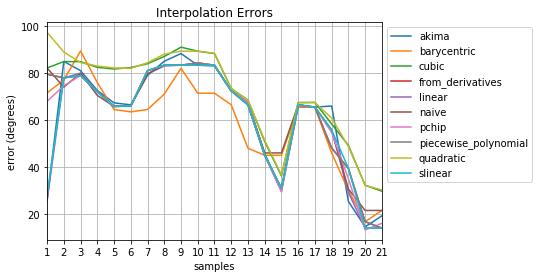

In [7]:
# For display purposes, eliminate Random and Krogh
median_errors = errors.groupby(['method', 'samples'])['error'].apply(lambda x: pd.Series.median(pd.Series.abs(x))).unstack().T
median_errors_reduced = median_errors.drop(median_errors[['random','krogh']], axis=1)
#median_errors_reduced = median_errors
ax = median_errors_reduced.plot(xticks=median_errors_reduced.index.values, grid=True, title="Interpolation Errors")
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("error (degrees)")

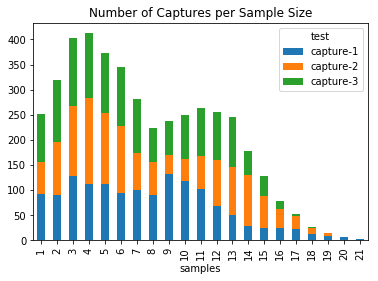

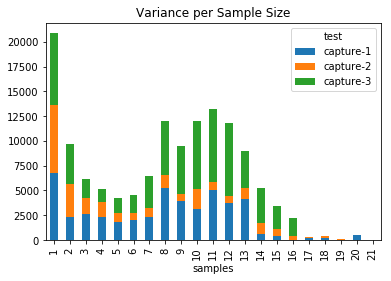

In [22]:
sample_spread = errors[errors['method']=='naive'].groupby(['test','samples'])['error'].count().unstack().T
sample_spread.plot(kind='bar', stacked=True, title="Number of Captures per Sample Size")

variance_spread = errors[errors['method']=='naive'].groupby(['test','samples'])['error'].var().unstack().T
variance_spread.plot(kind='bar', stacked=True, title="Variance per Sample Size")


Guess: 0, Naive: 251, True: 98.92714806486998


0

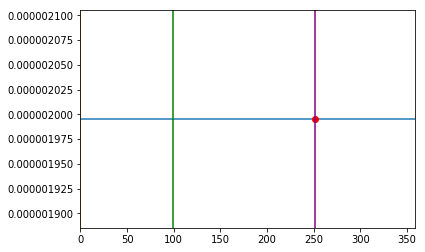

In [32]:
import locate
def get_nsample_set(n):
    rando = errors[(errors['samples']==n) & (errors['method']=='naive')].reset_index()
    i = np.random.randint(len(rando))
    test = rando.iloc[i]['test']
    pass_n = rando.iloc[i]['pass']
    bssid = rando.iloc[i]['bssid']
    return ingest.get_set(test, pass_n, bssid)

locate.locate_interpolate(ingest.prep_for_plot(get_nsample_set(1)), 'slinear', True, test='capture-1', bssid='00:12:17:9f:79:b6')




In [28]:
# Show the best methods for each number of samples
ntop = 5
idx = pd.MultiIndex.from_product([['method','error'],range(0,5)])
top_methods = median_errors.T.apply(lambda x: pd.Series(pd.concat([pd.Series(x.nsmallest(ntop).index, dtype=np.dtype(object)), pd.Series(x.nsmallest(ntop).values, dtype=np.dtype(object))])))
top_methods.set_index(idx, inplace=True)
top_methods = top_methods.swaplevel(1,0).sort_index()
top_methods

samples          1                 2                     3   \
0 error     25.6038           19.4412               17.4412   
  method      akima             naive      from_derivatives   
1 error     25.6038           19.4539               17.4412   
  method      krogh             pchip                linear   
2 error     25.6038           19.4539               17.4412   
  method     linear           slinear                 naive   
3 error     25.6038           19.9704               17.4412   
  method    slinear  from_derivatives                 pchip   
4 error     42.0947           19.9704               17.4412   
  method  quadratic            linear  piecewise_polynomial   

samples                     4                 5                 6   \
0 error                13.9782           12.5774           11.6009   
  method      from_derivatives             akima       barycentric   
1 error                13.9782           12.6009           11.6009   
  method                linear  from_derivatives  from_derivatives   
2 error                13.9782           12.6009           11.6009   
  method                 naive            linear            linear   
3 error                13.9782           12.6009           11.6009   
  method                 pchip             naive             naive   
4 error                13.9782           12.6009           11.6009   
  method  piecewise_polynomial             pchip             pchip   

samples                     7                     8                     9   \
0 error                11.0367               9.92715                 9.741   
  method      from_derivatives      from_derivatives                linear   
1 error                11.0367               9.92715                 9.741   
  method  piecewise_polynomial                linear               slinear   
2 error                11.0367               9.92715               9.92715   
  method               slinear                 naive      from_derivatives   
3 error                11.2012               9.92715               9.92715   
  method                linear  piecewise_polynomial                 pchip   
4 error                11.2012               9.92715               9.92715   
  method                 pchip               slinear  piecewise_polynomial   

samples                 10          ...                             12  \
0 error            9.92715          ...                        10.4386   
  method            linear          ...                          pchip   
1 error            9.92715          ...                        13.0367   
  method           slinear          ...               from_derivatives   
2 error            10.0367          ...                        13.0367   
  method             naive          ...           piecewise_polynomial   
3 error            10.0367          ...                        13.3233   
  method             pchip          ...                         linear   
4 error            10.3233          ...                        13.3233   
  method  from_derivatives          ...                        slinear   

samples                     13                    14       15  \
0 error                12.4386               15.1318  14.3413   
  method                 pchip                 pchip    pchip   
1 error                 14.741               19.8211  15.9975   
  method      from_derivatives                 akima    akima   
2 error                 14.741               23.2906  20.5573   
  method  piecewise_polynomial      from_derivatives    cubic   
3 error                15.4731               23.2906  20.7906   
  method                linear  piecewise_polynomial   linear   
4 error                15.4731               25.3982  20.7906   
  method               slinear                 cubic  slinear   

samples                     16                    17         18  \
0 error                10.4386               8.49283    14.7451   
  method   